In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**The Analysis will follow the following steps**

1) First we will understand the data and see how it looks like

2) We will perform basic preprocessing on the data and try to clean it

3) We will check for the distribution of the data

4) We will count the number of unique classes for each column

5) Discuss and write the statements that we need to analyze

6) Create Graphs and charts for the analysis

7) Create a dashboard for the complete analysis

**1) First we will understand the data and see how it looks like**

Read the File:

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/HealthApp_2k.log_structured.csv")

In [ ]:
df.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


In [ ]:
df.shape

(2000, 7)

In [ ]:
df.columns

Index(['LineId', 'Time', 'Component', 'Pid', 'Content', 'EventId',
       'EventTemplate'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LineId         2000 non-null   int64 
 1   Time           2000 non-null   object
 2   Component      2000 non-null   object
 3   Pid            2000 non-null   int64 
 4   Content        2000 non-null   object
 5   EventId        2000 non-null   object
 6   EventTemplate  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


**2) We will perform basic preprocessing on the data and try to clean it**

In [ ]:
df.isnull().sum()

LineId           0
Time             0
Component        0
Pid              0
Content          0
EventId          0
EventTemplate    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

**3) We will check for the distribution of the data**

In [ ]:
df.describe()

,LineId,Pid
count,2000.000000,2000.0
mean,1000.500000,30002312.0
std,577.494589,0.0
min,1.000000,30002312.0
25%,500.750000,30002312.0
50%,1000.500000,30002312.0
75%,1500.250000,30002312.0
max,2000.000000,30002312.0


To Understand columns in better way we are doing pandas profiling and generating an html Report

In [ ]:
from pydantic_settings import BaseSettings

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 17.8 MB 23.3 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357887 sha256=e9a3490e4419ff3f2abfee485b998b42795ea4d5c114a9cd434fb6e15426bb03
  Stored in directory: /tmp/pip-ephem-wheel-cache-2abwjizu/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
Successfully built ydata-profiling
  Attempting uninstall: ydata-profiling
    Found existing installation: ydata-profiling 4.6.4
    Uninstalling ydata-profiling-4.6.4:
      Successfully uninstalled ydata-profiling-4.6.4


In [ ]:
import os
os._exit(00)

In [ ]:
import pandas_profiling

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="data set", html={'style' : {'full_width':True}})
profile.to_file(output_file="Health_app_data_analytics.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**4) We will count the number of unique classes for each column**

In [ ]:
df["Pid"].value_counts()

30002312    2000
Name: Pid, dtype: int64

In [ ]:
df["Component"].value_counts()

Step_LSC                       710
Step_SPUtils                   494
Step_ExtSDM                    482
Step_StandReportReceiver       171
HiH_HiSyncControl               42
Step_StandStepCounter           19
HiH_DataStatManager             17
HiH_HiHealthDataInsertStore     11
HiH_                            10
HiH_HiHealthBinder               9
HiH_HiAppUtil                    8
Step_FlushableStepDataCache      8
HiH_HiBroadcastUtil              5
Step_StandStepDataManager        5
HiH_ListenerManager              2
HiH_HiSyncUtil                   2
Step_HGNH                        2
Step_ScreenUtil                  1
Step_DataCache                   1
Step_NotificationUtil            1
Name: Component, dtype: int64

In [ ]:
df["EventId"].value_counts()

E39    273
E42    260
E22    242
E58    241
E3     241
      ... 
E51      1
E31      1
E74      1
E73      1
E5       1
Name: EventId, Length: 75, dtype: int64

In [ ]:
df["Content"].value_counts()

calculateAltitudeWithCache totalAltitude=240                                                             217
processHandleBroadcastAction action:android.intent.action.TIME_TICK                                      144
onStandStepChanged 3786                                                                                   73
onStandStepChanged 3761                                                                                   59
calculateCaloriesWithCache totalCalories=130673                                                           48
                                                                                                        ... 
onExtend:1514038677000 1 0 4                                                                               1
 getTodayTotalDetailSteps = 1514038560000##7105##548582##8661##16256##27319968                             1
setTodayTotalDetailSteps=1514038560000##7106##548583##8661##16256##27320969                                1
calculateCaloriesWi

In [ ]:
df["EventTemplate"].value_counts()

onExtend:<*> <*> <*> <*>                                                                               273
onStandStepChanged <*>                                                                                 260
getTodayTotalDetailSteps = <*>##<*>##<*>##<*>##<*>##<*>                                                242
setTodayTotalDetailSteps=<*>                                                                           241
calculateAltitudeWithCache totalAltitude=<*>                                                           241
                                                                                                      ... 
saveRealTimeHealthDatasStat() size = <*>,totalTime = <*>                                                 1
insertHiHealthData() bulkSaveDetailHiHealthData fail errorCode = <*>,errorMessage = ERR_DATA_INSERT      1
uploadStaticsToDB() onResult  type = <*> obj=true                                                        1
uploadStaticsToDB failed message=true

In [ ]:
df["Time"].value_counts()

20171223-23:7:6:86       12
20171223-23:14:24:384     7
20171223-22:30:23:993     6
20171223-22:19:58:366     6
20171223-22:19:58:518     6
                         ..
20171223-22:19:15:858     1
20171223-22:19:15:855     1
20171223-22:19:14:688     1
20171223-22:19:14:686     1
20171224-1:2:35:789       1
Name: Time, Length: 1711, dtype: int64

**5) Discuss and write the statements that we need to analyze**

                        AND

**6) Create Charts / Graphs for analysis**

a) DAILY COUNT STEPS (How many steps he took on daily basis)

In [ ]:
time_format = '%Y%m%d-%H:%M:%S:%f'
df['Time'] = pd.to_datetime(df['Time'], format=time_format)
df['Time'] = df['Time'].apply(lambda x: x.strftime('%Y%m%d-%H:%M'))

In [ ]:
df.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


In [ ]:
time_format = '%Y%m%d-%H:%M'
df['Time'] = pd.to_datetime(df['Time'], format=time_format)
df['year'] = df['Time'].dt.year
df['month'] = df['Time'].dt.month
df['day'] = df['Time'].dt.day

In [ ]:
df.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate,year,month,day
0,1,2017-12-23 22:15:00,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,2017,12,23
1,2,2017-12-23 22:15:00,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,2017,12,23
2,3,2017-12-23 22:15:00,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,2017,12,23
3,4,2017-12-23 22:15:00,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,2017,12,23
4,5,2017-12-23 22:15:00,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data,2017,12,23


In [ ]:
df["year"].value_counts()


2017    2000
Name: year, dtype: int64

In [ ]:
df["month"].value_counts()

12    2000
Name: month, dtype: int64

In [ ]:
df["day"].value_counts()

23    1776
24     224
Name: day, dtype: int64

In [ ]:
group_data1 = df.groupby('Time').agg({'Pid': 'count', 'Content': 'count'})
group_data1

,Pid,Content
Time,,
2017-12-23 22:15:00,311,311
2017-12-23 22:16:00,12,12
2017-12-23 22:17:00,239,239
2017-12-23 22:18:00,33,33
2017-12-23 22:19:00,217,217
...,...,...
2017-12-24 00:58:00,1,1
2017-12-24 00:59:00,1,1
2017-12-24 01:00:00,1,1


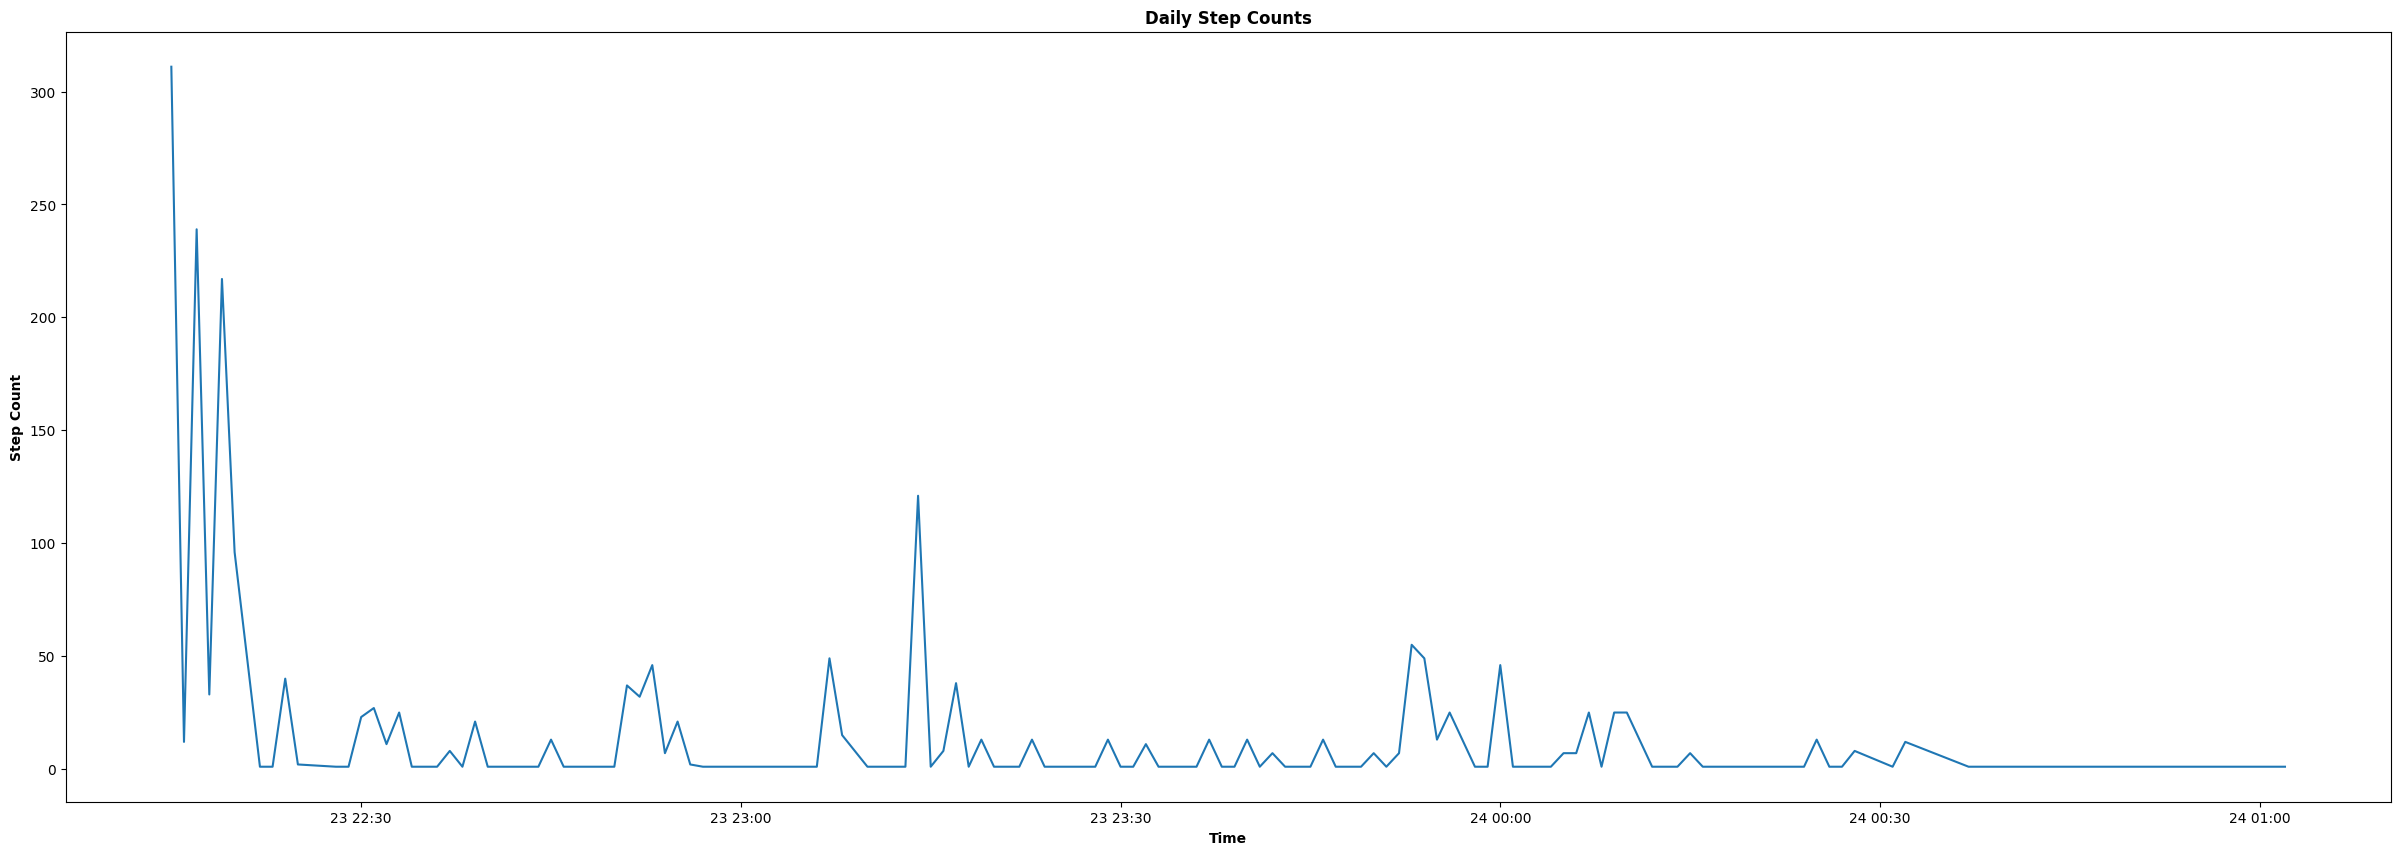

In [ ]:
plt.figure(figsize=(30, 10))
plt.plot(group_data1.index, group_data1['Pid'])
plt.title('Daily Step Counts',fontweight='bold')
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Step Count',fontweight='bold')


plt.show()

b) Active Time for Person Work Out

<ipython-input-34-d019f55e2cd5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_data['Time'] = pd.to_datetime(event_data['Time'])
<ipython-input-34-d019f55e2cd5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_data['Time'] = pd.to_datetime(event_data['Time'])
<ipython-input-34-d019f55e2cd5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

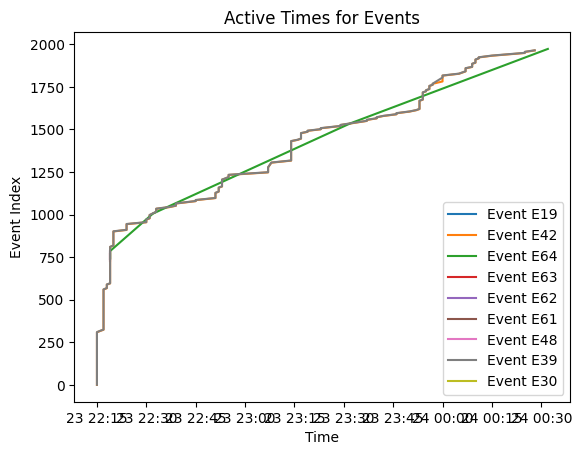

In [ ]:
def plot_active_times(event_id_list):
    for event_id in event_id_list:
        # Filter the dataframe for the specific event_id
        event_data = df[df['EventId'] == event_id]

        # Convert the 'time' column to datetime
        event_data['Time'] = pd.to_datetime(event_data['Time'])

        # Plot the active times
        plt.plot(event_data['Time'], event_data.index, label=f'Event {event_id}')

    plt.xlabel('Time')
    plt.ylabel('Event Index')
    plt.title('Active Times for Events')
    plt.legend()
    plt.show()

# Example: List of event_ids for which you want to find active times
event_ids_to_plot = ['E19','E42','E64','E63','E62','E61','E48','E39','E30']

# Call the function to plot active times
plot_active_times(event_ids_to_plot)

** For more better understanding of Active Times of Event we plot Heatmap**

<ipython-input-35-595ce7f473e3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Time'] = pd.to_datetime(filtered_data['Time'])


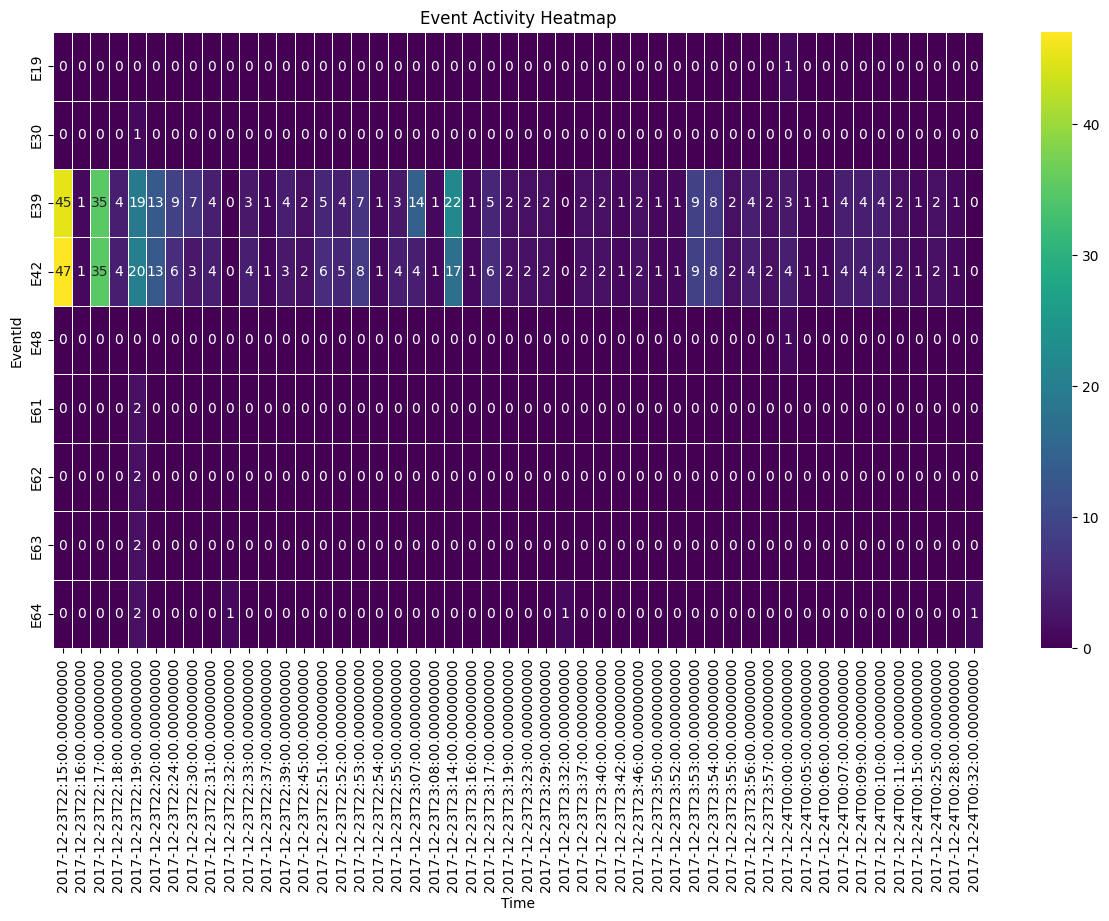

In [ ]:
def plot_heatmap(event_id_list):
    # Filter the dataframe for the specified event_ids
    filtered_data = df[df['EventId'].isin(event_id_list)]

    # Convert the 'time' column to datetime
    filtered_data['Time'] = pd.to_datetime(filtered_data['Time'])

    # Create a pivot table for the heatmap
    heatmap_data = filtered_data.pivot_table(index='EventId', columns='Time', aggfunc='size', fill_value=0)

    # Plot the heatmap
    plt.figure(figsize=(15, 8))
    sns.heatmap(heatmap_data, cmap='viridis', linewidths=.5, annot=True, fmt="d")
    plt.title('Event Activity Heatmap')
    plt.show()

# Example: List of event_ids for which you want to find active times
event_ids_to_plot = ['E19','E42','E64','E63','E62','E61','E48','E39','E30']

# Call the function to plot the heatmap
plot_heatmap(event_ids_to_plot)

c) Calculate Frequency of Each Component

In [ ]:
dict1 = {'Component' : df['Component'].unique(), 'Count' : df['Component'].value_counts()}
temp2 = pd.DataFrame(dict1)
temp2 = temp2.reset_index(drop=True)

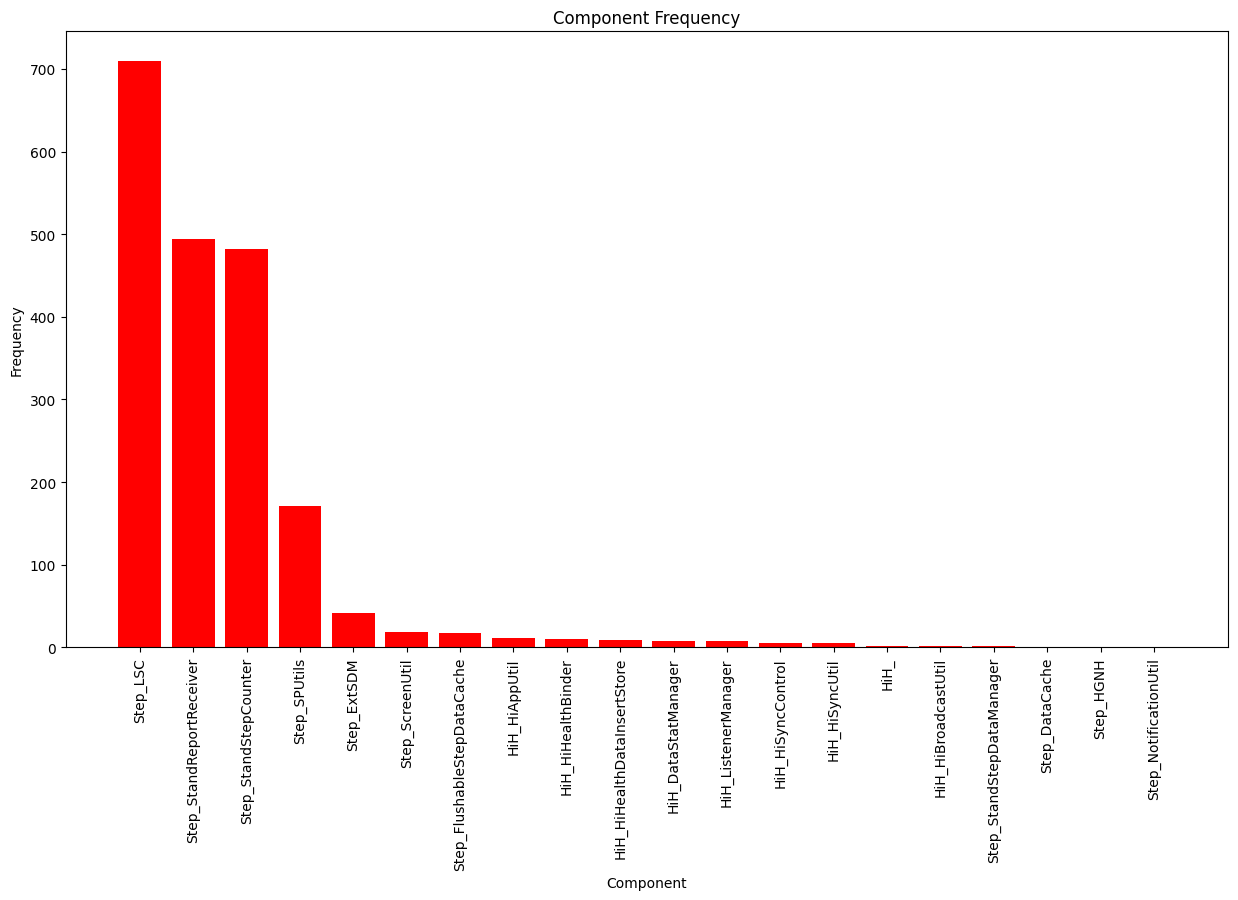

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(temp2['Component'], temp2['Count'], color='red')
plt.xlabel('Component')
plt.ylabel('Frequency')
plt.title('Component Frequency')
plt.xticks(rotation=90)
plt.show()

d) Calculate Frequency of each Event

In [ ]:
dict2 = {'Event' : df['EventId'].unique(), 'Count' : df['EventId'].value_counts()}
temp3 = pd.DataFrame(dict2)
temp3 = temp3.reset_index(drop=True)

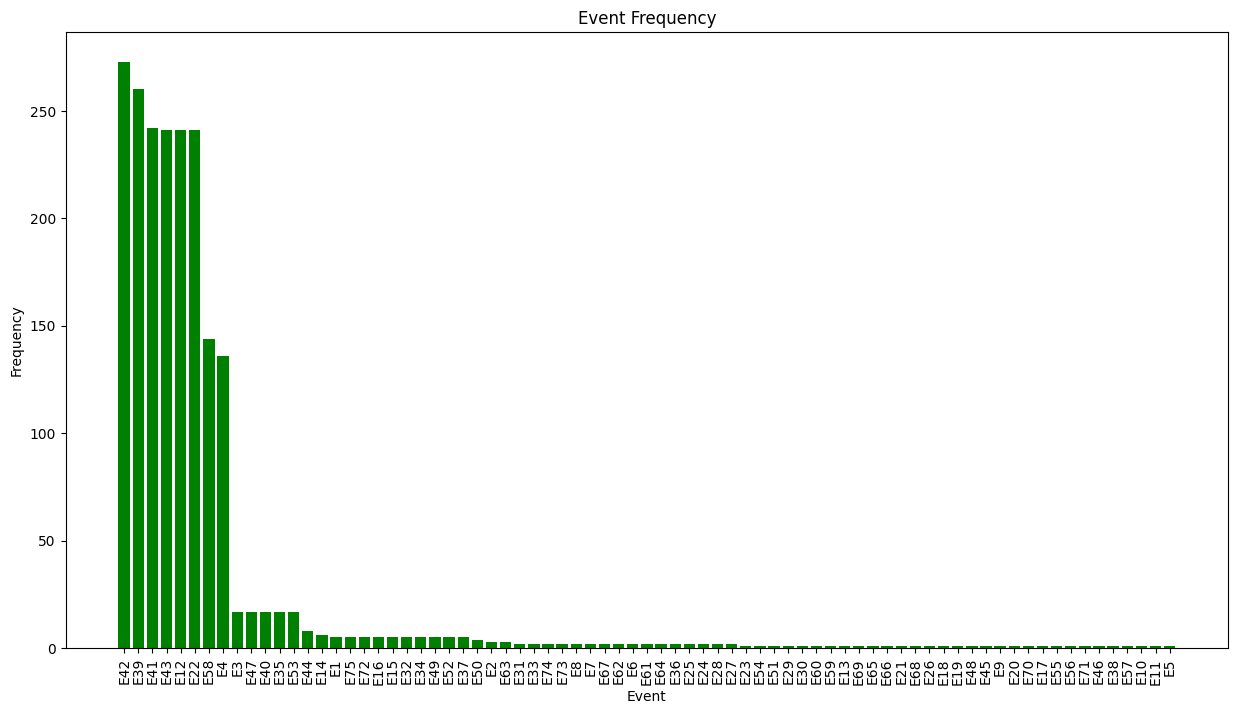

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(temp3['Event'], temp3['Count'], color='green')
plt.xlabel('Event')
plt.ylabel('Frequency')
plt.title('Event Frequency')
plt.xticks(rotation=90)
plt.show()

e) Frequency of Unique EventId for each component

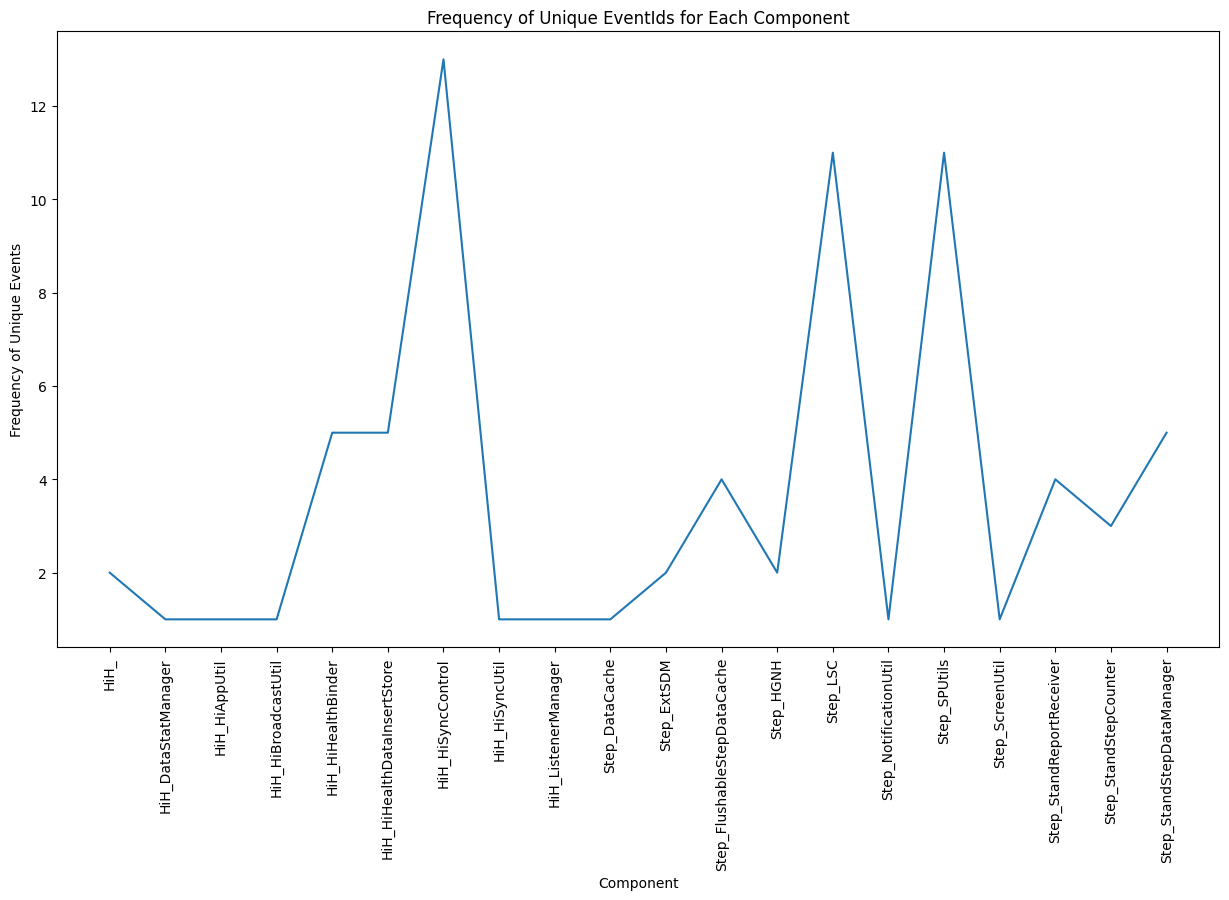

In [ ]:
component_eventid_counts = df.groupby('Component')['EventId'].nunique().reset_index()

plt.figure(figsize=(15, 8))
plt.plot(component_eventid_counts['Component'], component_eventid_counts['EventId'])
plt.xlabel('Component')
plt.ylabel('Frequency of Unique Events')
plt.title('Frequency of Unique EventIds for Each Component')
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

f) Calculate Calories Burnt Over Time

<ipython-input-41-4f80dfd483e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Calories Burnt'] = calories_df['Content'].str.extract(r'totalCalories=(\d+)')[0].astype(int)
<ipython-input-41-4f80dfd483e8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Time'] = pd.to_datetime(calories_df['Time'], format='%Y%m%d-%H:%M')


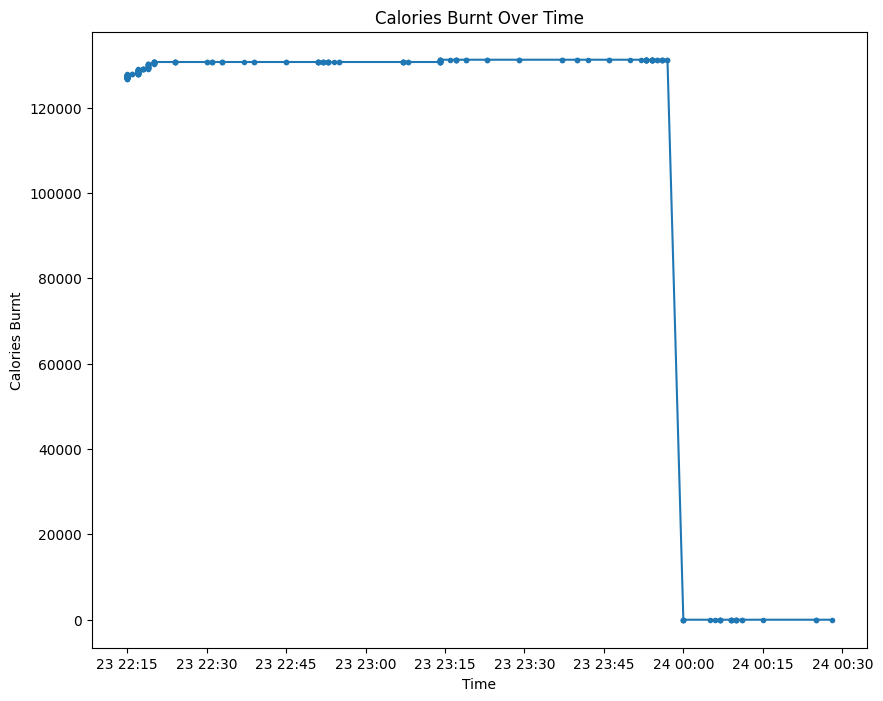

In [ ]:
# Filter rows containing calories burnt information
calories_df = df[df['Content'].str.contains('calculateCaloriesWithCache')]

# Extract calorie values from the "Content" column
calories_df['Calories Burnt'] = calories_df['Content'].str.extract(r'totalCalories=(\d+)')[0].astype(int)

# Convert the "Time" column to datetime format
calories_df['Time'] = pd.to_datetime(calories_df['Time'], format='%Y%m%d-%H:%M')
plt.figure(figsize=(10, 8))
plt.plot(calories_df['Time'], calories_df['Calories Burnt'], marker='.', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Calories Burnt')
plt.title('Calories Burnt Over Time')
plt.grid(False)

# Show the plot
plt.show()

g) Calculate Total Altitude over time

<ipython-input-42-d17b40bc5a67>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  altitude_df['Total Altitude'] = altitude_df['Content'].str.extract(r'totalAltitude=(\d+)')[0].astype(int)
<ipython-input-42-d17b40bc5a67>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  altitude_df['Time'] = pd.to_datetime(altitude_df['Time'], format='%Y%m%d-%H:%M')


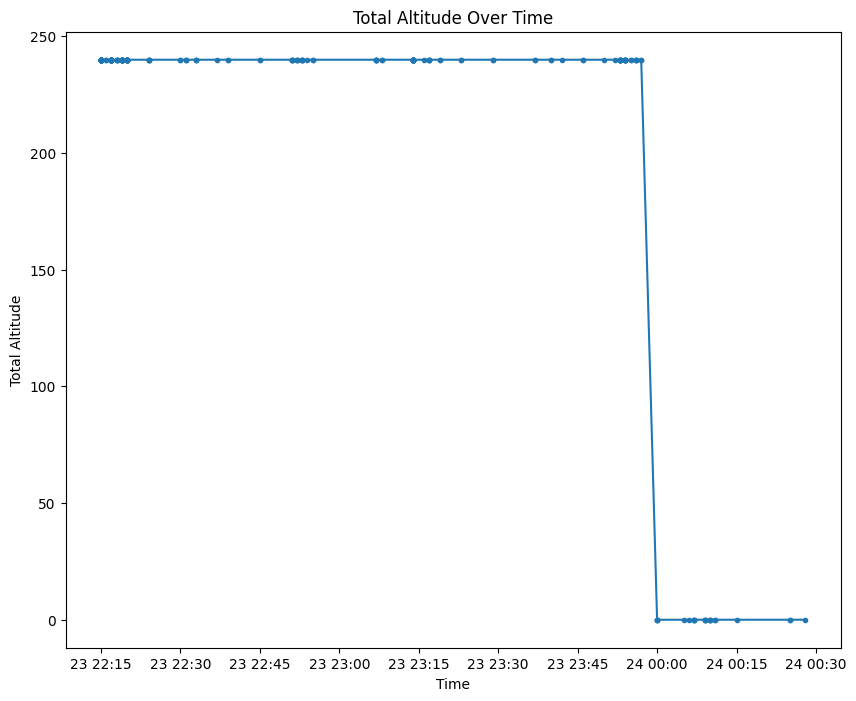

In [ ]:
# Filter rows containing calculate altitude information
altitude_df = df[df['Content'].str.contains('calculateAltitudeWithCache')]

# Extract altitude value from the "Content" column
altitude_df['Total Altitude'] = altitude_df['Content'].str.extract(r'totalAltitude=(\d+)')[0].astype(int)

# Convert the "Time" column to datetime format
altitude_df['Time'] = pd.to_datetime(altitude_df['Time'], format='%Y%m%d-%H:%M')
plt.figure(figsize=(10, 8))
plt.plot(altitude_df['Time'], altitude_df['Total Altitude'], marker='.', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Total Altitude')
plt.title('Total Altitude Over Time')
plt.grid(False)

# Show the plot
plt.show()

h) Total Detail Steps Over Time

<ipython-input-43-ebff96200656>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steps_df['Total Steps'] = steps_df['Content'].str.extract(r'getTodayTotalDetailSteps = (\d+)##(\d+)##(\d+)##(\d+)##(\d+)##(\d+)').astype(int).sum(axis=1)
<ipython-input-43-ebff96200656>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steps_df['Time'] = pd.to_datetime(steps_df['Time'], format='%Y%m%d-%H:%M')


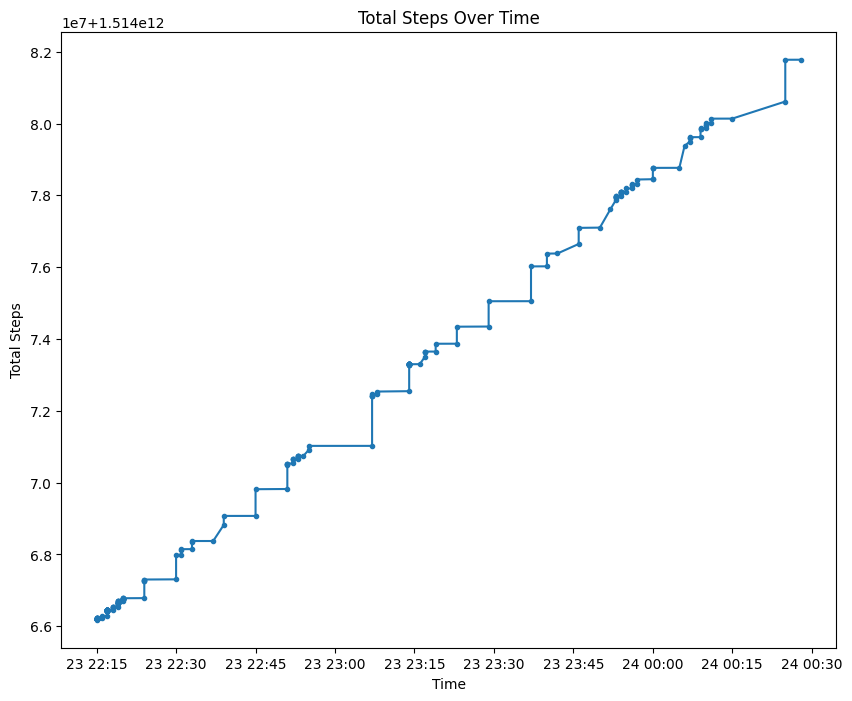

In [ ]:
# Filter rows containing calculate detail steps information
steps_df = df[df['Content'].str.contains('getTodayTotalDetailSteps')]

# Extract steps value from the "Content" column
steps_df['Total Steps'] = steps_df['Content'].str.extract(r'getTodayTotalDetailSteps = (\d+)##(\d+)##(\d+)##(\d+)##(\d+)##(\d+)').astype(int).sum(axis=1)

# Convert the "Time" column to datetime format
steps_df['Time'] = pd.to_datetime(steps_df['Time'], format='%Y%m%d-%H:%M')
plt.figure(figsize=(10, 8))
plt.plot(steps_df['Time'], steps_df['Total Steps'], marker='.', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Total Steps')
plt.title('Total Steps Over Time')
plt.grid(False)

# Show the plot
plt.show()

**7) Create a dashboard for the complete analysis**

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


<ipython-input-44-b384b6653dc2>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-44-b384b6653dc2>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [ ]:
import plotly.express as px

In [ ]:
# Grouping data
group_data1 = df.groupby('Time').agg({'Pid': 'count', 'Content': 'count'}).reset_index()
# Filter rows containing calories burnt information
calories_df = df[df['Content'].str.contains('calculateCaloriesWithCache')]

# Extract calorie values from the "Content" column
calories_df['Calories Burnt'] = calories_df['Content'].str.extract(r'totalCalories=(\d+)')[0].astype(int)

# Convert the "Time" column to datetime format
calories_df['Time'] = pd.to_datetime(calories_df['Time'], format='%Y%m%d-%H:%M')

# Filter rows containing calculate altitude information
altitude_df = df[df['Content'].str.contains('calculateAltitudeWithCache')]

# Extract altitude value from the "Content" column
altitude_df['Total Altitude'] = altitude_df['Content'].str.extract(r'totalAltitude=(\d+)')[0].astype(int)

# Convert the "Time" column to datetime format
altitude_df['Time'] = pd.to_datetime(altitude_df['Time'], format='%Y%m%d-%H:%M')

# Filter rows containing calculate detail steps information
steps_df = df[df['Content'].str.contains('getTodayTotalDetailSteps')]

# Extract steps value from the "Content" column
steps_df['Total Steps'] = steps_df['Content'].str.extract(r'getTodayTotalDetailSteps = (\d+)##(\d+)##(\d+)##(\d+)##(\d+)##(\d+)').astype(int).sum(axis=1)

# Convert the "Time" column to datetime format
steps_df['Time'] = pd.to_datetime(steps_df['Time'], format='%Y%m%d-%H:%M')
# Create Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div(children=[
    html.H1(children='Daily Step Counts Dashboard'),

    # Line Chart
    dcc.Graph(
        id='line-chart',
        figure={
            'data': [
                {
                    'x': group_data1['Time'],
                    'y': group_data1['Pid'],
                    'type': 'line',
                    'marker': {'color': 'blue'},
                },
            ],
            'layout': {
                'title': 'Daily Step Counts',
                'xaxis': {'title': 'Time'},
                'yaxis': {'title': 'Step Count'},
            }
        }
    ),

    # Active Times Graph
    dcc.Graph(id='active-times-chart'),
    # Input for event_ids
    dcc.Input(
        id='event-ids-input',
        type='text',
        value='E19,E42,E64,E63,E62,E61,E48,E39,E30',
        style={'width': '50%'}
    ),

    # Component Frequency Bar Chart
    dcc.Graph(
        id='component-frequency-chart',
        figure={
            'data': [
                {
                    'x': df['Component'].unique(),
                    'y': df['Component'].value_counts(),
                    'type': 'bar',
                    'marker': {'color': 'red'},
                },
            ],
            'layout': {
                'title': 'Component Frequency',
                'xaxis': {'title': 'Component'},
                'yaxis': {'title': 'Frequency'},
            }
        }
    ),

    # Event Frequency Bar Chart
    dcc.Graph(
        id='event-frequency-chart',
        figure={
            'data': [
                {
                    'x': df['EventId'].unique(),
                    'y': df['EventId'].value_counts(),
                    'type': 'bar',
                    'marker': {'color': 'green'},
                },
            ],
            'layout': {
                'title': 'Event Frequency',
                'xaxis': {'title': 'Event'},
                'yaxis': {'title': 'Frequency'},
            }
        }
    ),

    # Frequency of Unique EventIds for Each Component Line Chart
    dcc.Graph(
        id='unique-eventids-per-component-chart',
        figure={
            'data': [
                {
                    'x': df.groupby('Component')['EventId'].nunique().reset_index()['Component'],
                    'y': df.groupby('Component')['EventId'].nunique().reset_index()['EventId'],
                    'type': 'line',
                },
            ],
            'layout': {
                'title': 'Frequency of Unique EventIds for Each Component',
                'xaxis': {'title': 'Component'},
                'yaxis': {'title': 'Frequency of Unique Events'},
            }
        }
    ),

    # Calories Burnt Over Time Line Chart
    dcc.Graph(
        id='calories-burnt-chart',
        figure=px.line(calories_df, x='Time', y='Calories Burnt', labels={'Calories Burnt': 'Calories Burnt'}),




    ),

    # Total Altitude Over Time Line Chart
    dcc.Graph(
        id='total-altitude-chart',
        figure=px.line(altitude_df, x='Time', y='Total Altitude', labels={'Total Altitude': 'Total Altitude'}),
    ),

    # Total Steps Over Time Line Chart
    dcc.Graph(
        id='total-steps-chart',
        figure=px.line(steps_df, x='Time', y='Total Steps', labels={'Total Steps': 'Total Steps'}),
    ),



])

# Callback to update the Active Times Graph
@app.callback(
    Output('active-times-chart', 'figure'),
    [Input('event-ids-input', 'value')]
)
def update_active_times_chart(event_ids_str):
    # Convert input string to a list of event_ids
    event_ids = event_ids_str.split(',')

    # Create a subplot with shared x-axis
    fig, ax = plt.subplots()
    ax.set_xlabel('Time')
    ax.set_ylabel('Event Index')
    ax.set_title('Active Times for Events')

    for event_id in event_ids:
        # Filter the dataframe for the specific event_id
        event_data = df[df['EventId'] == event_id]

        # Convert the 'time' column to datetime
        event_data['Time'] = pd.to_datetime(event_data['Time'])

        # Plot the active times
        ax.plot(event_data['Time'], event_data.index, label=f'Event {event_id}')

    ax.legend()

    # Convert the Matplotlib figure to a Plotly figure
    fig = plt.gcf()
    plotly_fig = mpl_to_plotly(fig)

    return plotly_fig

# Convert Matplotlib figure to Plotly figure
def mpl_to_plotly(fig):
    import plotly.tools as tls

    # Convert Matplotlib figure to Plotly figure
    plotly_fig = tls.mpl_to_plotly(fig)

    # Adjust the layout for better display
    plotly_fig['layout']['showlegend'] = True
    plotly_fig['layout']['xaxis']['title'] = 'Time'
    plotly_fig['layout']['yaxis']['title'] = 'Event Index'
    plotly_fig['layout']['title'] = 'Active Times for Events'

    return plotly_fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)




<ipython-input-72-75e05c5ca8b5>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-75e05c5ca8b5>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-75e05c5ca8b5>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-75e05

<IPython.core.display.Javascript object>